In [70]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import os

# Call the dataframe

In [71]:
os.getcwd()

'/Users/carlosito/Library/CloudStorage/OneDrive-Personal/Personal Document/Hexamind/hexamind_code/Carrefour/Clustering/FinalClassifier'

In [72]:
CARREFOUR_FILEPATH = "data/final_carrefour_df.csv"
df = pd.read_csv(CARREFOUR_FILEPATH, index_col=0)

## Call the multi-label classifier tokenizer and model and have prediction

In [163]:
CLF_MODEL_FILEPATH  = "model/clf_bayes.sav"
loaded_clf = joblib.load(CLF_MODEL_FILEPATH)

TOKENIZER_FILEPATH = "model/tokenizer.sav"
loaded_tokenizer = joblib.load(TOKENIZER_FILEPATH)

In [164]:
def create_combined_reviews(titles, reviews):
    if pd.isna(reviews):
        combined_reviews = titles
    else:
        combined_reviews = titles + " " + reviews
        
    return combined_reviews

In [75]:
df['combined_reviews'] = np.vectorize(create_combined_reviews)(df.titles, df.reviews)
assert ~df['combined_reviews'].isnull().any()

,titles,ratings,reviews,dates,replies,reply_dates
0,Après carrefour banque qui m’attribue…,1,Après carrefour banque qui m’attribue un plafo...,2023-03-02T09:25:46.000Z,"Bonjour, pouvez-vous s'il vous plait nous comm...",2023-03-02T11:18:49.000Z
1,Produits higt tech .,2,Produits higt tech .\nAcheté 3 mascottes jo 20...,2023-03-02T18:24:09.000Z,"Bonjour, nous vous invitons à nous rejoindre s...",2023-03-03T07:45:39.000Z
2,Tout d'abord Carrefour Givors c'est…,2,Tout d'abord Carrefour Givors c'est inadmissib...,2023-02-27T19:08:37.000Z,"Bonjour, contact pris avec votre magasin, celu...",2023-02-28T16:01:08.000Z
3,Carrefour Jeuxey Epinal une catastrophe !! L,1,Ras le bol des rayons vides a toute heure !! I...,2023-02-28T17:39:59.000Z,Merci. Pourriez-vous nous indiquer quels sont ...,2023-03-01T08:29:13.000Z
4,Carrefour Saint André les Vergers…,1,Carrefour Saint André les Vergers (aube)\n450 ...,2023-03-02T22:25:42.000Z,NaN,NaN
...,...,...,...,...,...,...
1995,scandaleux,1,Je comprends pourquoi ils peuvent mettre des p...,2014-04-04T14:58:35.000Z,NaN,NaN
1996,"Pas mal, Carrefour!",3,Le sité est un peu chaotique mais le prix sont...,2014-03-27T10:13:30.000Z,NaN,NaN
1997,Impec rien à dire,5,J'ai commandé une télé pour noël pour mes pare...,2014-03-22T14:34:52.000Z,NaN,NaN
1998,9 € affiché 19 € facturé,1,"C'est la fête des prix chez carrefour, je vous...",2014-03-17T17:22:34.000Z,NaN,NaN


In [76]:
df[: 5]

,titles,ratings,reviews,dates,replies,reply_dates,combined_reviews
0,Après carrefour banque qui m’attribue…,1,Après carrefour banque qui m’attribue un plafo...,2023-03-02T09:25:46.000Z,"Bonjour, pouvez-vous s'il vous plait nous comm...",2023-03-02T11:18:49.000Z,Après carrefour banque qui m’attribue… Après c...
1,Produits higt tech .,2,Produits higt tech .\nAcheté 3 mascottes jo 20...,2023-03-02T18:24:09.000Z,"Bonjour, nous vous invitons à nous rejoindre s...",2023-03-03T07:45:39.000Z,Produits higt tech . Produits higt tech .\nAch...
2,Tout d'abord Carrefour Givors c'est…,2,Tout d'abord Carrefour Givors c'est inadmissib...,2023-02-27T19:08:37.000Z,"Bonjour, contact pris avec votre magasin, celu...",2023-02-28T16:01:08.000Z,Tout d'abord Carrefour Givors c'est… Tout d'ab...
3,Carrefour Jeuxey Epinal une catastrophe !! L,1,Ras le bol des rayons vides a toute heure !! I...,2023-02-28T17:39:59.000Z,Merci. Pourriez-vous nous indiquer quels sont ...,2023-03-01T08:29:13.000Z,Carrefour Jeuxey Epinal une catastrophe !! L R...
4,Carrefour Saint André les Vergers…,1,Carrefour Saint André les Vergers (aube)\n450 ...,2023-03-02T22:25:42.000Z,NaN,NaN,Carrefour Saint André les Vergers… Carrefour S...


## Classfify

# 

In [77]:
prediction = loaded_clf.predict(loaded_tokenizer.transform(df.combined_reviews)).toarray()
prediction.shape

(2000, 4)

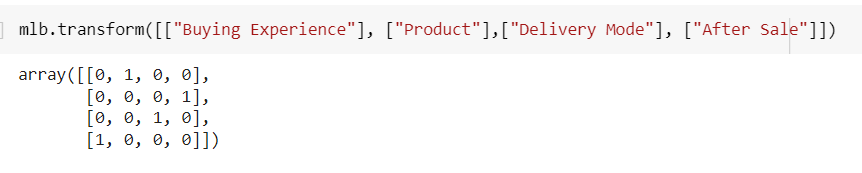

In [78]:
BE_class = prediction[:, 1]
PD_class = prediction[:, 3]
DM_class = prediction[:, 2]
AS_class = prediction[:, 0]

In [79]:
prediction = np.vstack([BE_class, PD_class, DM_class, AS_class]).T
print(prediction.shape)
print(prediction.sum(axis = 0))

(2000, 4)
[1511  292  493  690]


In [80]:
new_columns = ['clean_BE', 'clean_PD', 'clean_DM', 'clean_AS']
prediction_df = pd.DataFrame(prediction, columns=new_columns)
prediction_df.head()


,clean_BE,clean_PD,clean_DM,clean_AS
0,1,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [81]:
final_df = pd.concat([df, prediction_df], axis=1)
final_df.head()

,titles,ratings,reviews,dates,replies,reply_dates,combined_reviews,clean_BE,clean_PD,clean_DM,clean_AS
0,Après carrefour banque qui m’attribue…,1,Après carrefour banque qui m’attribue un plafo...,2023-03-02T09:25:46.000Z,"Bonjour, pouvez-vous s'il vous plait nous comm...",2023-03-02T11:18:49.000Z,Après carrefour banque qui m’attribue… Après c...,1,0,0,1
1,Produits higt tech .,2,Produits higt tech .\nAcheté 3 mascottes jo 20...,2023-03-02T18:24:09.000Z,"Bonjour, nous vous invitons à nous rejoindre s...",2023-03-03T07:45:39.000Z,Produits higt tech . Produits higt tech .\nAch...,0,0,0,1
2,Tout d'abord Carrefour Givors c'est…,2,Tout d'abord Carrefour Givors c'est inadmissib...,2023-02-27T19:08:37.000Z,"Bonjour, contact pris avec votre magasin, celu...",2023-02-28T16:01:08.000Z,Tout d'abord Carrefour Givors c'est… Tout d'ab...,1,0,0,0
3,Carrefour Jeuxey Epinal une catastrophe !! L,1,Ras le bol des rayons vides a toute heure !! I...,2023-02-28T17:39:59.000Z,Merci. Pourriez-vous nous indiquer quels sont ...,2023-03-01T08:29:13.000Z,Carrefour Jeuxey Epinal une catastrophe !! L R...,1,0,0,0
4,Carrefour Saint André les Vergers…,1,Carrefour Saint André les Vergers (aube)\n450 ...,2023-03-02T22:25:42.000Z,NaN,NaN,Carrefour Saint André les Vergers… Carrefour S...,1,0,0,0


In [82]:
final_df.to_csv('final_carrefour_df_with_label.csv')

In [83]:
final_df

,titles,ratings,reviews,dates,replies,reply_dates,combined_reviews,clean_BE,clean_PD,clean_DM,clean_AS
0,Après carrefour banque qui m’attribue…,1,Après carrefour banque qui m’attribue un plafo...,2023-03-02T09:25:46.000Z,"Bonjour, pouvez-vous s'il vous plait nous comm...",2023-03-02T11:18:49.000Z,Après carrefour banque qui m’attribue… Après c...,1,0,0,1
1,Produits higt tech .,2,Produits higt tech .\nAcheté 3 mascottes jo 20...,2023-03-02T18:24:09.000Z,"Bonjour, nous vous invitons à nous rejoindre s...",2023-03-03T07:45:39.000Z,Produits higt tech . Produits higt tech .\nAch...,0,0,0,1
2,Tout d'abord Carrefour Givors c'est…,2,Tout d'abord Carrefour Givors c'est inadmissib...,2023-02-27T19:08:37.000Z,"Bonjour, contact pris avec votre magasin, celu...",2023-02-28T16:01:08.000Z,Tout d'abord Carrefour Givors c'est… Tout d'ab...,1,0,0,0
3,Carrefour Jeuxey Epinal une catastrophe !! L,1,Ras le bol des rayons vides a toute heure !! I...,2023-02-28T17:39:59.000Z,Merci. Pourriez-vous nous indiquer quels sont ...,2023-03-01T08:29:13.000Z,Carrefour Jeuxey Epinal une catastrophe !! L R...,1,0,0,0
4,Carrefour Saint André les Vergers…,1,Carrefour Saint André les Vergers (aube)\n450 ...,2023-03-02T22:25:42.000Z,NaN,NaN,Carrefour Saint André les Vergers… Carrefour S...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,scandaleux,1,Je comprends pourquoi ils peuvent mettre des p...,2014-04-04T14:58:35.000Z,NaN,NaN,scandaleux Je comprends pourquoi ils peuvent m...,1,0,1,0
1996,"Pas mal, Carrefour!",3,Le sité est un peu chaotique mais le prix sont...,2014-03-27T10:13:30.000Z,NaN,NaN,"Pas mal, Carrefour! Le sité est un peu chaotiq...",1,0,0,0
1997,Impec rien à dire,5,J'ai commandé une télé pour noël pour mes pare...,2014-03-22T14:34:52.000Z,NaN,NaN,Impec rien à dire J'ai commandé une télé pour ...,0,0,1,1
1998,9 € affiché 19 € facturé,1,"C'est la fête des prix chez carrefour, je vous...",2014-03-17T17:22:34.000Z,NaN,NaN,9 € affiché 19 € facturé C'est la fête des pri...,1,0,0,0


## Experiment on datetime

In [4]:
df = pd.read_csv("/Users/carlosito/Library/CloudStorage/OneDrive-Personal/Personal Document/Hexamind/hexamind_code/Carrefour/Clustering/FinalClassifier/data/final_carrefour_df_with_label.csv", index_col=0)

In [7]:
def rating_to_star(rating: int):
    star = "⭐" * rating
    
    return star

In [10]:
#Define some data querying and aggregation
clean_superclass = ['clean_BE', 'clean_PD', 'clean_DM', 'clean_AS']
group_df  = df.loc[: , ['ratings', 'dates'] + clean_superclass ] #  we need to have 'dates' for further timedifference
group_df['stars'] = group_df['ratings'].apply(lambda x: rating_to_star(int(x)))
group_df['topic_count'] = group_df.iloc[ :, 2:6].sum(axis= 1)

# Transform the columns 'dates' to datetime format so as to use the .last method
group_df['dates'] = pd.to_datetime(group_df['dates'])
last_3m_df  = group_df.sort_values(by="dates",ascending=True).set_index("dates").last("3M")

In [13]:
pd.Timestamp.today()

Timestamp('2023-03-03 13:57:01.328048')

In [15]:
from pandas.tseries.offsets import DateOffset

In [35]:
today = pd.Timestamp.today()
cut_off_3m_date = today - DateOffset(months=3)

print(today)
print(cut_off_3m_date)

In [84]:
print(today)
print(cut_off_3m_date)

2023-03-03 14:05:13.871022
2022-12-03 14:05:13.871022


In [85]:
group_df[group_df['dates'] < cut_off_3m_date.tz_localize('utc')]

,ratings,dates,clean_BE,clean_PD,clean_DM,clean_AS,stars,topic_count
56,1,2022-12-03 13:24:51+00:00,1,0,1,0,⭐,2
59,1,2022-11-30 14:23:48+00:00,1,0,1,1,⭐,3
62,1,2022-11-29 16:54:12+00:00,0,1,0,1,⭐,2
65,1,2022-11-24 13:11:49+00:00,1,0,0,1,⭐,2
66,1,2022-11-30 10:16:20+00:00,0,0,1,1,⭐,2
...,...,...,...,...,...,...,...,...
1995,1,2014-04-04 14:58:35+00:00,1,0,1,0,⭐,2
1996,3,2014-03-27 10:13:30+00:00,1,0,0,0,⭐⭐⭐,1
1997,5,2014-03-22 14:34:52+00:00,0,0,1,1,⭐⭐⭐⭐⭐,2
1998,1,2014-03-17 17:22:34+00:00,1,0,0,0,⭐,1


In [42]:
cut_off_3m_date

Timestamp('2022-12-03 14:05:13.871022')

In [22]:
n = group_df.sort_values(by="dates",ascending=True).set_index("dates")

In [33]:
n.reset_index()

,ratings,clean_BE,clean_PD,clean_DM,clean_AS,stars,topic_count
dates,,,,,,,
2014-02-25 20:02:26+00:00,2,1,0,1,1,⭐⭐,3
2014-03-17 17:22:34+00:00,1,1,0,0,0,⭐,1
2014-03-22 14:34:52+00:00,5,0,0,1,1,⭐⭐⭐⭐⭐,2
2014-03-27 10:13:30+00:00,3,1,0,0,0,⭐⭐⭐,1
2014-04-04 14:58:35+00:00,1,1,0,1,0,⭐,2
...,...,...,...,...,...,...,...
2023-03-01 15:58:22+00:00,4,0,0,1,0,⭐⭐⭐⭐,1
2023-03-02 09:25:46+00:00,1,1,0,0,1,⭐,2
2023-03-02 10:53:39+00:00,1,0,0,1,0,⭐,1


In [27]:
pd.to_datetime(today)

Timestamp('2023-03-03 13:59:40.738504')

In [29]:
n.index[0] < pd.to_datetime(today)

TypeError: Cannot compare tz-naive and tz-aware timestamps

### Wordcloud experiment

In [48]:
import stylecloud

In [146]:
df

,titles,ratings,reviews,dates,replies,reply_dates,combined_reviews
0,Après carrefour banque qui m’attribue…,1,Après carrefour banque qui m’attribue un plafo...,2023-03-02T09:25:46.000Z,"Bonjour, pouvez-vous s'il vous plait nous comm...",2023-03-02T11:18:49.000Z,Après carrefour banque qui m’attribue… Après c...
1,Produits higt tech .,2,Produits higt tech .\nAcheté 3 mascottes jo 20...,2023-03-02T18:24:09.000Z,"Bonjour, nous vous invitons à nous rejoindre s...",2023-03-03T07:45:39.000Z,Produits higt tech . Produits higt tech .\nAch...
2,Tout d'abord Carrefour Givors c'est…,2,Tout d'abord Carrefour Givors c'est inadmissib...,2023-02-27T19:08:37.000Z,"Bonjour, contact pris avec votre magasin, celu...",2023-02-28T16:01:08.000Z,Tout d'abord Carrefour Givors c'est… Tout d'ab...
3,Carrefour Jeuxey Epinal une catastrophe !! L,1,Ras le bol des rayons vides a toute heure !! I...,2023-02-28T17:39:59.000Z,Merci. Pourriez-vous nous indiquer quels sont ...,2023-03-01T08:29:13.000Z,Carrefour Jeuxey Epinal une catastrophe !! L R...
4,Carrefour Saint André les Vergers…,1,Carrefour Saint André les Vergers (aube)\n450 ...,2023-03-02T22:25:42.000Z,NaN,NaN,Carrefour Saint André les Vergers… Carrefour S...
...,...,...,...,...,...,...,...
1995,scandaleux,1,Je comprends pourquoi ils peuvent mettre des p...,2014-04-04T14:58:35.000Z,NaN,NaN,scandaleux Je comprends pourquoi ils peuvent m...
1996,"Pas mal, Carrefour!",3,Le sité est un peu chaotique mais le prix sont...,2014-03-27T10:13:30.000Z,NaN,NaN,"Pas mal, Carrefour! Le sité est un peu chaotiq..."
1997,Impec rien à dire,5,J'ai commandé une télé pour noël pour mes pare...,2014-03-22T14:34:52.000Z,NaN,NaN,Impec rien à dire J'ai commandé une télé pour ...
1998,9 € affiché 19 € facturé,1,"C'est la fête des prix chez carrefour, je vous...",2014-03-17T17:22:34.000Z,NaN,NaN,9 € affiché 19 € facturé C'est la fête des pri...


In [51]:
df.combined_reviews

0       Après carrefour banque qui m’attribue… Après c...
1       Produits higt tech . Produits higt tech .\nAch...
2       Tout d'abord Carrefour Givors c'est… Tout d'ab...
3       Carrefour Jeuxey Epinal une catastrophe !! L R...
4       Carrefour Saint André les Vergers… Carrefour S...
                              ...                        
1995    scandaleux Je comprends pourquoi ils peuvent m...
1996    Pas mal, Carrefour! Le sité est un peu chaotiq...
1997    Impec rien à dire J'ai commandé une télé pour ...
1998    9 € affiché 19 € facturé C'est la fête des pri...
1999    produit non en stock mais pas informé Commande...
Name: combined_reviews, Length: 2000, dtype: object

In [89]:
with open("sth", 'a') as f:
    dfAsString = df.combined_reviews.to_string(header=False, index=False)
    f.write(dfAsString)

In [90]:
stylecloud.gen_stylecloud(file_path="/Users/carlosito/Library/CloudStorage/OneDrive-Personal/Personal Document/Hexamind/hexamind_code/Carrefour/Clustering/FinalClassifier/sth",
                          icon_name= "fas fa-apple-alt")

In [138]:
from wordcloud import WordCloud, ImageColorGenerator 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# create a mask based on the image we wish to include
my_mask = np.array(Image.open("/Users/carlosito/Library/CloudStorage/OneDrive-Personal/Personal Document/Hexamind/hexamind_code/Carrefour/Clustering/FinalClassifier/output-onlinepngtools.png"))
# create a wordcloud 
wc = WordCloud(background_color='white',
               mask=my_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=1,
               contour_color='white',
               max_words=50)

In [142]:
sth = wc.generate(dfAsString)

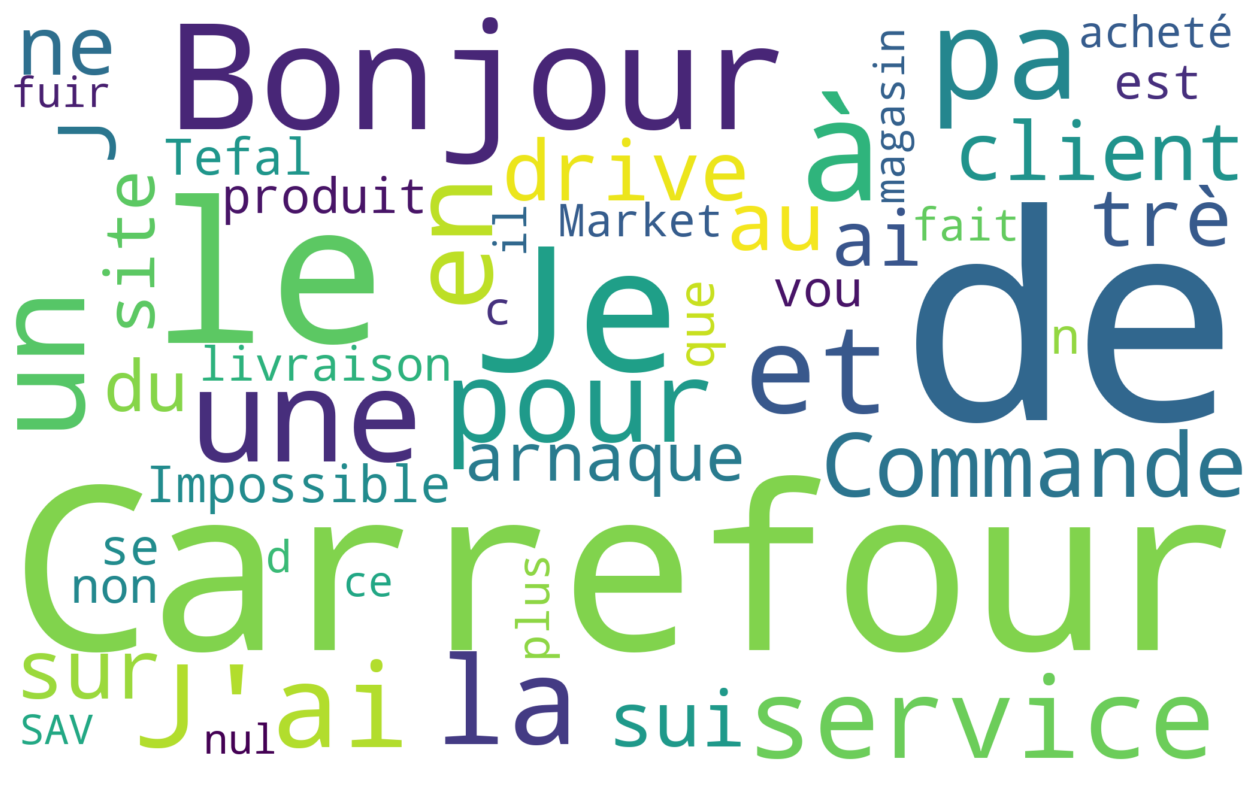

In [143]:
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

In [148]:
new_df = pd.read_csv("/Users/carlosito/Library/CloudStorage/OneDrive-Personal/Personal Document/Hexamind/hexamind_code/Carrefour/Clustering/FinalClassifier/data/final_carrefour_df_with_label.csv")

In [152]:
new_df[new_df['clean_AS']==1].combined_reviews

0       Après carrefour banque qui m’attribue… Après c...
1       Produits higt tech . Produits higt tech .\nAch...
5       Remboursement non effectué J'ai acheté début f...
9       Carrefour solde des pc pas en stock Carrefour ...
10      Commande d une imprimante en… Commande n°60084...
                              ...                        
1992    A FUIR COMME LA PESTE!!!! J'ai commandé un gps...
1993    commande iphone 5c Téléphone commandé le Vendr...
1994    honteux ! Il y a tant à dire :\r\n1. J'ai payé...
1997    Impec rien à dire J'ai commandé une télé pour ...
1999    produit non en stock mais pas informé Commande...
Name: combined_reviews, Length: 690, dtype: object

# Transform competitors df to final labelled df

In [257]:
auchan_df = pd.read_csv("data/final_auchan_df.csv",
                        index_col=0)
lidl_df = pd.read_csv("data/final_lidl_df.csv",
                        index_col=0)
leclerc_df = pd.read_csv("data/final_leclerc_df.csv",
                        index_col=0)
carrefour_df = pd.read_csv("data/final_carrefour_df.csv",
                        index_col=0)


In [250]:
def classify_df(df):
    prediction = loaded_clf.predict(loaded_tokenizer.transform(df.combined_reviews)).toarray()
    BE_class = prediction[:, 1]
    PD_class = prediction[:, 3]
    DM_class = prediction[:, 2]
    AS_class = prediction[:, 0]
    prediction = np.vstack([BE_class, PD_class, DM_class, AS_class]).T
    print(prediction.shape)
    print(prediction.sum(axis = 0))
    new_columns = ['clean_BE', 'clean_PD', 'clean_DM', 'clean_AS']
    prediction_df = pd.DataFrame(prediction, columns=new_columns)
    final_df = pd.concat([df, prediction_df], axis=1)
    return final_df


def check_response(replies):
    if pd.isna(replies):
        status = 0 # meaning there is 'nan' value here
    
    else:
        status = 1
    
    return status


def tranform_to_final(df):
    df['combined_reviews'] = np.vectorize(create_combined_reviews)(df.titles, df.reviews) #create combined columns
    df = classify_df(df) #classfiy multi-label from the reviews
    df['has_respond'] = np.vectorize(check_response)(df.replies) #check the response rate
    return df

In [290]:
all_company_df = [auchan_df, carrefour_df, lidl_df, leclerc_df]
all_company_name = ["auchan", "carrefour", "lidl", "leclerc"]
for index, df in enumerate(all_company_df):
    print(index, df.shape)
    all_company_df[index] = tranform_to_final(df)
    all_company_df[index]['company_name'] = all_company_name[index]
    # all_company_df[index].to_csv(f'final_{all_company_name[index]}_df_with_label.csv')

0 (2000, 7)
(2000, 4)
[1176  274  751 1352]
1 (2000, 7)
(2000, 4)
[1511  292  493  690]
2 (2000, 7)
(2000, 4)
[1365  693   42  535]
3 (1971, 7)
(1971, 4)
[1335  320  565 1094]


## Stack all dataframe for plot score chart

In [291]:
all_comp_df = pd.concat(all_company_df)

In [292]:
all_comp_df['company_name'].value_counts()

auchan       2000
carrefour    2000
lidl         2000
leclerc      1971
Name: company_name, dtype: int64

In [383]:
# all_comp_df.to_csv('all_comp_df.csv')

In [272]:
all_comp_df.groupby(['clean_BE', 'clean_AS']).mean()

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_15882/150771770.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_comp_df.groupby(['clean_BE', 'clean_AS']).mean()


ratings  clean_PD  clean_DM  has_respond
clean_BE clean_AS                                           
0        0         2.053731  0.526866  0.208955     0.159701
         1         1.222571  0.251306  0.339080     0.246604
1        0         1.625895  0.179890  0.067218     0.156474
         1         1.140581  0.052362  0.465566     0.238475

In [368]:
all_result = []
clean_superclass_name = ['🛒 Buying Experience', '🥦 Product', '🚚 Delivery Mode', '📞 After Sales']
for comp in all_comp_df['company_name'].unique():
    selected_df = all_comp_df[(all_comp_df['company_name'] == comp)]
    print(comp, selected_df.ratings.mean(), selected_df.has_respond.mean())
    result = [comp, 'All topics', len(selected_df), selected_df.ratings.mean().round(2), selected_df.has_respond.mean().round(2)]
    all_result.append(result)
    
    clean_superclass = ['clean_BE', 'clean_PD', 'clean_DM', 'clean_AS']
    
    for index, supclass in enumerate(clean_superclass):
        selected_df = all_comp_df[(all_comp_df['company_name'] == comp) &
                                  (all_comp_df[supclass] ==1)]
        
        result = [comp, clean_superclass_name[index], len(selected_df), selected_df.ratings.mean().round(2), selected_df.has_respond.mean().round(2)]
        all_result.append(result)

auchan 1.2875 0.504
carrefour 1.552 0.279
lidl 1.6985 0.0
leclerc 1.2917300862506342 0.0


In [384]:
def chart_df(all_comp_df):
    all_result = []
    clean_superclass_name = ['🛒 Buying Experience', '🥦 Product', '🚚 Delivery Mode', '📞 After Sales']
    for comp in all_comp_df['company_name'].unique():
        selected_df = all_comp_df[(all_comp_df['company_name'] == comp)]
        print(comp, selected_df.ratings.mean(), selected_df.has_respond.mean())
        result = [comp, 'All topics', len(selected_df), selected_df.ratings.mean().round(2), selected_df.has_respond.mean().round(2)]
        all_result.append(result)
        
        clean_superclass = ['clean_BE', 'clean_PD', 'clean_DM', 'clean_AS']
        
        for index, supclass in enumerate(clean_superclass):
            selected_df = all_comp_df[(all_comp_df['company_name'] == comp) &
                                    (all_comp_df[supclass] ==1)]
            
            result = [comp, clean_superclass_name[index], len(selected_df), selected_df.ratings.mean().round(2), selected_df.has_respond.mean().round(2)]
            all_result.append(result)
            
    complete_df = pd.DataFrame(all_result, columns= ['company', 'topic', 'count', 'score', 'response'])
    return complete_df

In [385]:
chart_df(all_comp_df)

auchan 1.2875 0.504
carrefour 1.552 0.279
lidl 1.6985 0.0
leclerc 1.2917300862506342 0.0


,company,topic,count,score,response
0,auchan,All topics,2000,1.29,0.50
1,auchan,🛒 Buying Experience,1176,1.33,0.48
2,auchan,🥦 Product,274,1.32,0.56
3,auchan,🚚 Delivery Mode,751,1.24,0.46
4,auchan,📞 After Sales,1352,1.12,0.50
5,carrefour,All topics,2000,1.55,0.28
6,carrefour,🛒 Buying Experience,1511,1.52,0.28
7,carrefour,🥦 Product,292,1.84,0.27
8,carrefour,🚚 Delivery Mode,493,1.37,0.31
9,carrefour,📞 After Sales,690,1.20,0.30


In [369]:
all_result

[['auchan', 'All topics', 2000, 1.29, 0.5],
 ['auchan', '🛒 Buying Experience', 1176, 1.33, 0.48],
 ['auchan', '🥦 Product', 274, 1.32, 0.56],
 ['auchan', '🚚 Delivery Mode', 751, 1.24, 0.46],
 ['auchan', '📞 After Sales', 1352, 1.12, 0.5],
 ['carrefour', 'All topics', 2000, 1.55, 0.28],
 ['carrefour', '🛒 Buying Experience', 1511, 1.52, 0.28],
 ['carrefour', '🥦 Product', 292, 1.84, 0.27],
 ['carrefour', '🚚 Delivery Mode', 493, 1.37, 0.31],
 ['carrefour', '📞 After Sales', 690, 1.2, 0.3],
 ['lidl', 'All topics', 2000, 1.7, 0.0],
 ['lidl', '🛒 Buying Experience', 1365, 1.69, 0.0],
 ['lidl', '🥦 Product', 693, 1.73, 0.0],
 ['lidl', '🚚 Delivery Mode', 42, 1.52, 0.0],
 ['lidl', '📞 After Sales', 535, 1.43, 0.0],
 ['leclerc', 'All topics', 1971, 1.29, 0.0],
 ['leclerc', '🛒 Buying Experience', 1335, 1.3, 0.0],
 ['leclerc', '🥦 Product', 320, 1.51, 0.0],
 ['leclerc', '🚚 Delivery Mode', 565, 1.22, 0.0],
 ['leclerc', '📞 After Sales', 1094, 1.13, 0.0]]

In [370]:
complete_df =  pd.DataFrame(all_result, columns= ['company', 'topic', 'count', 'score', 'response'])
complete_df

,company,topic,count,score,response
0,auchan,All topics,2000,1.29,0.50
1,auchan,🛒 Buying Experience,1176,1.33,0.48
2,auchan,🥦 Product,274,1.32,0.56
3,auchan,🚚 Delivery Mode,751,1.24,0.46
4,auchan,📞 After Sales,1352,1.12,0.50
5,carrefour,All topics,2000,1.55,0.28
6,carrefour,🛒 Buying Experience,1511,1.52,0.28
7,carrefour,🥦 Product,292,1.84,0.27
8,carrefour,🚚 Delivery Mode,493,1.37,0.31
9,carrefour,📞 After Sales,690,1.20,0.30


In [371]:
import plotly.express as px

In [375]:
category_orders = {'company' : ['carrefour' , 'auchan', 'leclerc', 'lidl']}

In [382]:
chart = px.histogram(data_frame=complete_df,
             x= 'topic', color='company',  y = 'score', 
             barmode='group',
             text_auto=True,
             histfunc='avg',
             color_discrete_sequence=px.colors.qualitative.T10,
             category_orders = category_orders)
chart.update_traces(textposition='outside',
                    )
chart.update_layout(xaxis_title = 'Topics',
                    yaxis_title = 'Average ratings (out of 5 score)')

In [301]:
all_comp_df[(all_comp_df['company_name'] == 'lidl')]

,titles,ratings,reviews,dates,replies,reply_dates,combined_reviews,clean_BE,clean_PD,clean_DM,clean_AS,has_respond,company_name
0,Non respect de la garantie!,1,Attention si vous achetez un produit chez Lidl...,2023-03-05T17:17:11.000Z,NaN,NaN,Non respect de la garantie! Attention si vous ...,0,1,0,1,0,lidl
1,Une horreur,1,"Tellement déçu, l horreur je me suis acheté l'...",2023-03-06T01:07:50.000Z,NaN,NaN,"Une horreur Tellement déçu, l horreur je me su...",1,0,0,0,0,lidl
2,Quand le matériel de Lidl est féfectueux...c'e...,5,Témoignage:ce matin je fais mes courses au Lid...,2023-03-04T11:47:48.000Z,NaN,NaN,Quand le matériel de Lidl est féfectueux...c'e...,1,0,0,0,0,lidl
3,"Caissier très mal ""léché"".",2,"Caissier très mal ""léché"".\nUn prix n'était pa...",2023-03-03T14:15:03.000Z,NaN,NaN,"Caissier très mal ""léché"". Caissier très mal ""...",1,0,0,0,0,lidl
4,Y en a marre d'être maltraité chez…,1,Y en a marre d'être maltraité chez Lidl. Aujou...,2023-03-03T22:55:17.000Z,NaN,NaN,Y en a marre d'être maltraité chez… Y en a mar...,1,0,0,0,0,lidl
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Je porte votre attention sur le magasin…,2,Je porte votre attention sur le magasin Lidl d...,2019-07-22T15:05:58.000Z,NaN,NaN,Je porte votre attention sur le magasin… Je po...,1,0,0,0,0,lidl
1996,Les magasins Lidl récemment rénovés offrent le...,4,Les magasins Lidl récemment rénovés comme celu...,2019-07-20T20:17:10.000Z,NaN,NaN,Les magasins Lidl récemment rénovés offrent le...,1,1,0,0,0,lidl
1997,Il y'a de très bons produits,3,Il y'a de très bons produits\nMais pas sur la ...,2019-07-18T11:59:53.000Z,NaN,NaN,Il y'a de très bons produits Il y'a de très bo...,1,1,0,0,0,lidl
1998,prix tres interessants en bio,5,"prix tres interessants en bio , continuez !!",2019-07-15T12:58:45.000Z,NaN,NaN,prix tres interessants en bio prix tres intere...,0,1,0,0,0,lidl


In [325]:
px.histogram(data_frame = all_comp_df,
             x= 'company_name', y='ratings',
             histfunc='avg')

In [295]:
clean_superclass = ['clean_BE', 'clean_PD', 'clean_DM', 'clean_AS']
for comp in all_comp_df['company_name'].unique():
    for supclass in clean_superclass:
        selected_df = all_comp_df[(all_comp_df['company_name'] == comp) &
                                  (all_comp_df[supclass] ==1)]
        score = selected_df.ratings.mean()
        print(comp, supclass, score)
        print(len(selected_df))

auchan clean_BE 1.3307823129251701
1176
auchan clean_PD 1.3248175182481752
274
auchan clean_DM 1.2383488681757657
751
auchan clean_AS 1.117603550295858
1352
carrefour clean_BE 1.5215089344804764
1511
carrefour clean_PD 1.8424657534246576
292
carrefour clean_DM 1.3691683569979716
493
carrefour clean_AS 1.2
690
lidl clean_BE 1.6864468864468865
1365
lidl clean_PD 1.733044733044733
693
lidl clean_DM 1.5238095238095237
42
lidl clean_AS 1.4299065420560748
535
leclerc clean_BE 1.303370786516854
1335
leclerc clean_PD 1.50625
320
leclerc clean_DM 1.224778761061947
565
leclerc clean_AS 1.13345521023766
1094


In [278]:
all_comp_df['company_name'].unique()

array(['auchan', 'carrefour', 'lidl', 'leclerc'], dtype=object)

In [387]:
complete_df

,company,topic,count,score,response
0,auchan,All topics,2000,1.29,0.50
1,auchan,🛒 Buying Experience,1176,1.33,0.48
2,auchan,🥦 Product,274,1.32,0.56
3,auchan,🚚 Delivery Mode,751,1.24,0.46
4,auchan,📞 After Sales,1352,1.12,0.50
5,carrefour,All topics,2000,1.55,0.28
6,carrefour,🛒 Buying Experience,1511,1.52,0.28
7,carrefour,🥦 Product,292,1.84,0.27
8,carrefour,🚚 Delivery Mode,493,1.37,0.31
9,carrefour,📞 After Sales,690,1.20,0.30


In [397]:
complete_df[(complete_df['topic'] == 'All topics') & (complete_df['company'] == 'carrefour') ].score

5    1.55
Name: score, dtype: float64

In [396]:
complete_df[(complete_df['topic'] == 'All topics')]

,company,topic,count,score,response
0,auchan,All topics,2000,1.29,0.50
5,carrefour,All topics,2000,1.55,0.28
10,lidl,All topics,2000,1.70,0.00
15,leclerc,All topics,1971,1.29,0.00


In [395]:
complete_df

,company,topic,count,score,response
0,auchan,All topics,2000,1.29,0.50
1,auchan,🛒 Buying Experience,1176,1.33,0.48
2,auchan,🥦 Product,274,1.32,0.56
3,auchan,🚚 Delivery Mode,751,1.24,0.46
4,auchan,📞 After Sales,1352,1.12,0.50
5,carrefour,All topics,2000,1.55,0.28
6,carrefour,🛒 Buying Experience,1511,1.52,0.28
7,carrefour,🥦 Product,292,1.84,0.27
8,carrefour,🚚 Delivery Mode,493,1.37,0.31
9,carrefour,📞 After Sales,690,1.20,0.30
